In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Painter import Painter

# Keypoints

In [3]:
name = 'sacre_coeur_A.jpg'

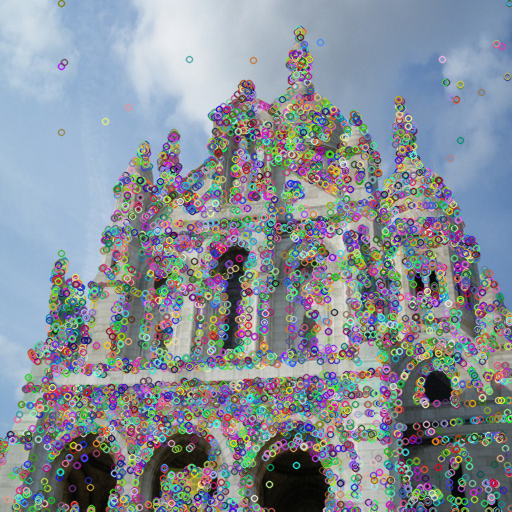

In [20]:
Painter.show_keypoints(name)

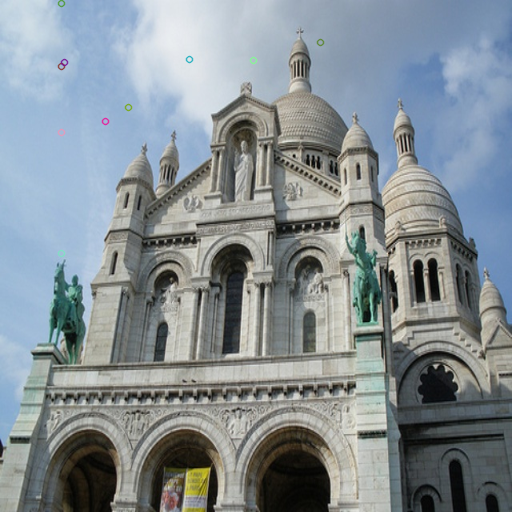

In [18]:
Painter.show_keypoints(name, level='patch')

# Matches

In [21]:
name_a = 'sacre_coeur_A.jpg'
name_b = 'sacre_coeur_B.jpg'

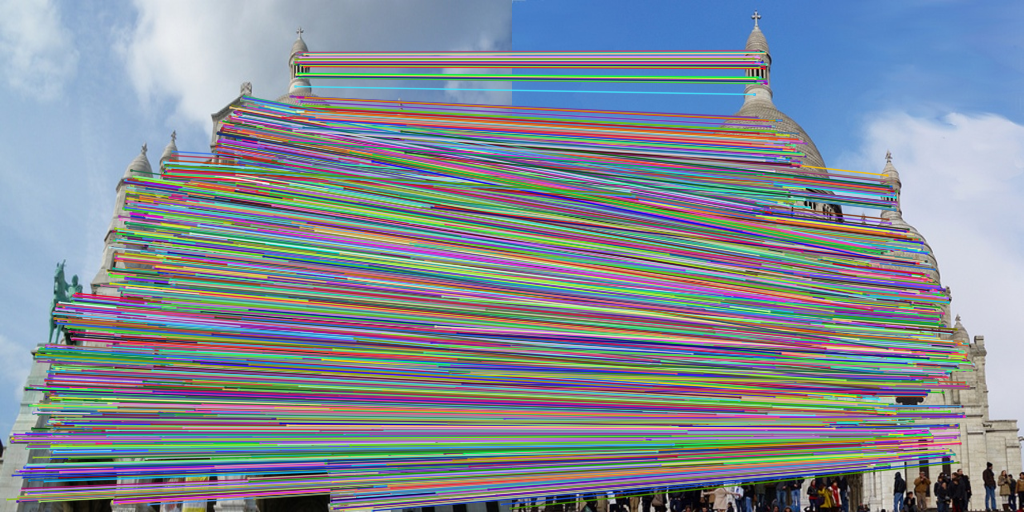

In [23]:
Painter.show_matches(name_a, name_b, num_points=None)

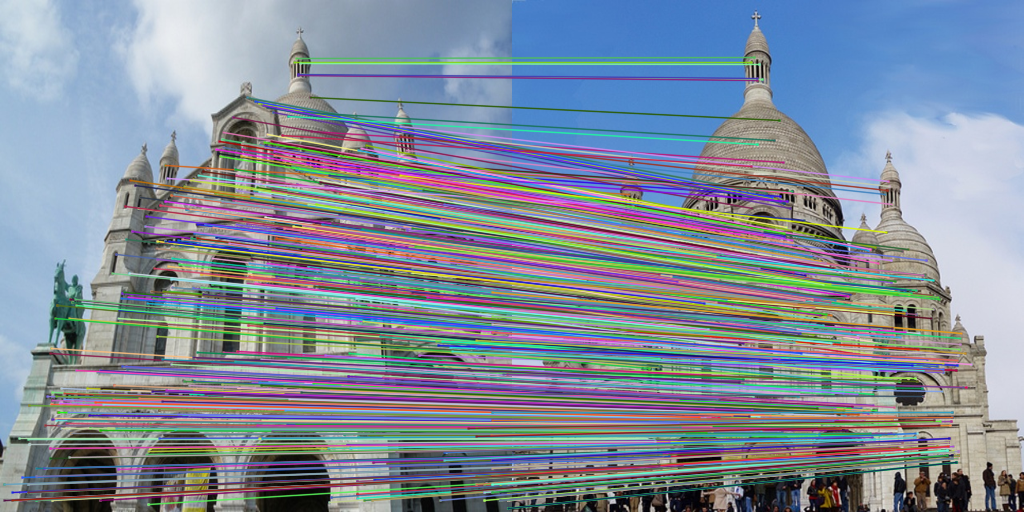

In [24]:
Painter.show_filtered_matches(name_a, name_b, num_points=None)